In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from matplotlib.patches import Patch
import datetime

%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [3]:
df = pd.read_csv('banklist.csv')

In [4]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [5]:
df['year'] = pd.to_datetime(df['Closing Date'])
df['year'] = df['year'].dt.strftime('%Y')

In [6]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017


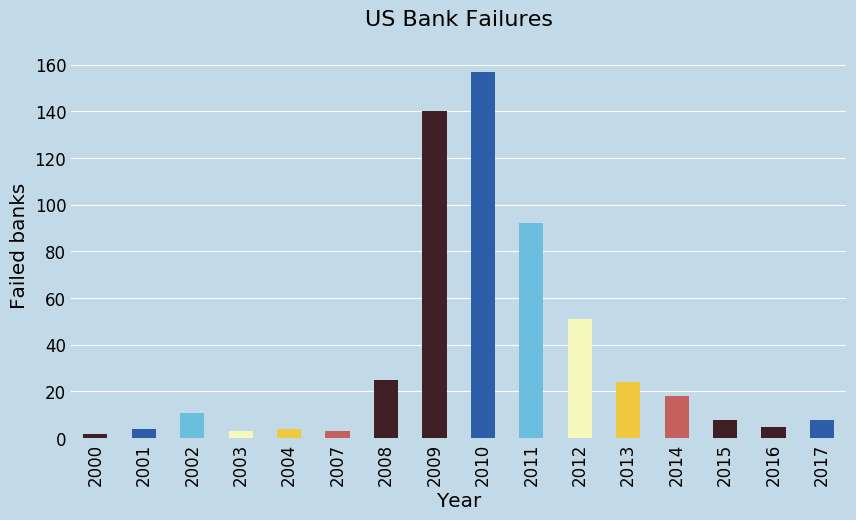

In [35]:
result = df.groupby('year').City.count()
ax = result.plot(kind='bar', figsize=(10, 5))

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': '#c2d9e7',
    'font.size': 12.0,
    'axes.facecolor': '#c2d9e7',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#402025', '#2D5FA8', '#6BBEDD', '#F6F7BC', '#F0C940', '#C5615C']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'legend.loc': 'upper right',
    'legend.fontsize': 'small'
})
ax.set_xlabel("Year")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures", pad=20)
ax.title.set_fontsize(16)

plt.show()

In [8]:
df['fail_date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')

In [9]:
df

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year,fail_date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2017,2017-12-15
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,2017,2017-10-13
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,2017,2017-05-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017,2017-05-05
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,2017,2017-04-28
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18,2017,2017-03-03
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17,2017,2017-01-27
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,18-May-17,2017,2017-01-13
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17,2016,2016-09-23
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,1-Jun-17,2016,2016-08-19


In [10]:
df['month'] = pd.to_datetime(df['fail_date'], format='%m')


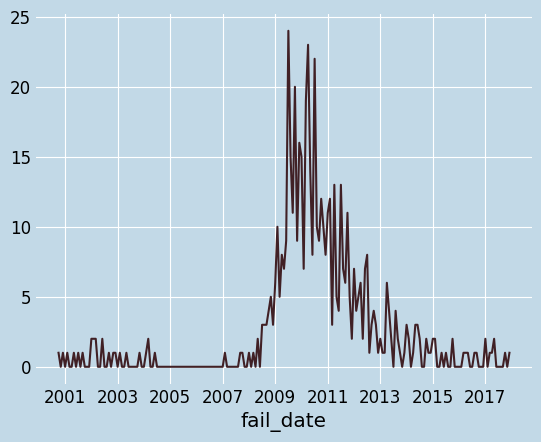

In [15]:
df.resample('M', on='fail_date').count().fail_date.plot()
#df.dtypes

plt.show()

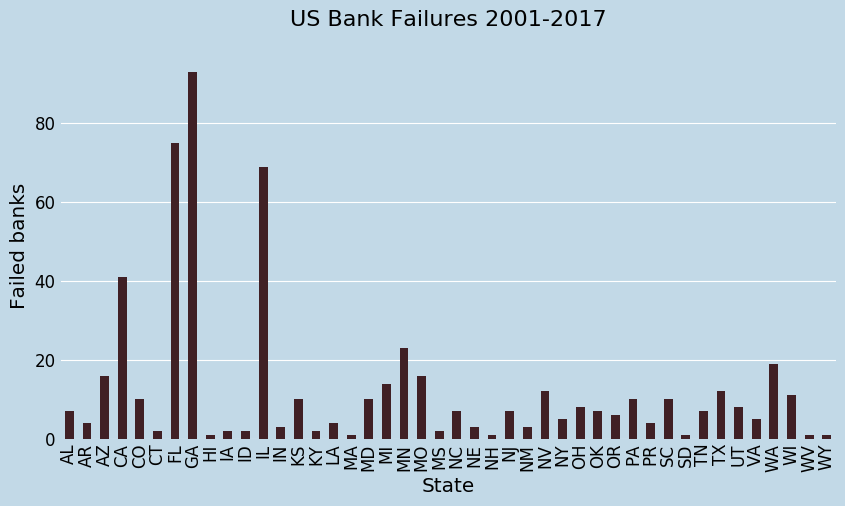

In [36]:
result = df.groupby('ST').count()
ax = result.plot(kind='bar', y='City', figsize=(10,5), color='#402025')

ax.set_xlabel("State")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures 2001-2017", pad=20)
ax.title.set_fontsize(16)
ax.legend().set_visible(False)

plt.show()

In [13]:
# revenue lost each year
# size of banks that failed in 2009 vs size of banks that failed in 2017

In [31]:
# select banks that failed after the Great Recession
df_recent = df
df_recent = df_recent[(df_recent['fail_date'] > '2013-1-1') & (df_recent['fail_date'] <= '2017-12-31')]
# df_recent

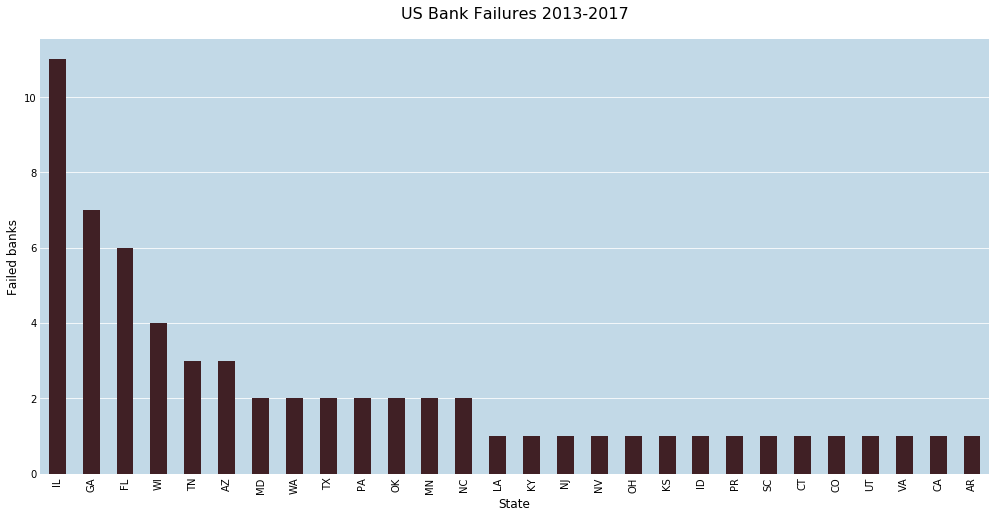

In [96]:
result = df_recent.groupby('ST').count().sort_values(by='City', ascending=False)
ax = result.plot(kind='bar', y='City', figsize=(17,8), color='#402025')

ax.set_xlabel("State")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures 2013-2017", pad=20)
ax.title.set_fontsize(16)
ax.legend().set_visible(False)

plt.show()

In [33]:
# select banks that failed during Great Recession
df_recession = df
df_recession = df_recession[(df_recession['fail_date'] > '2008-1-1') & (df_recession['fail_date'] <= '2012-12-31')]
# df_recession

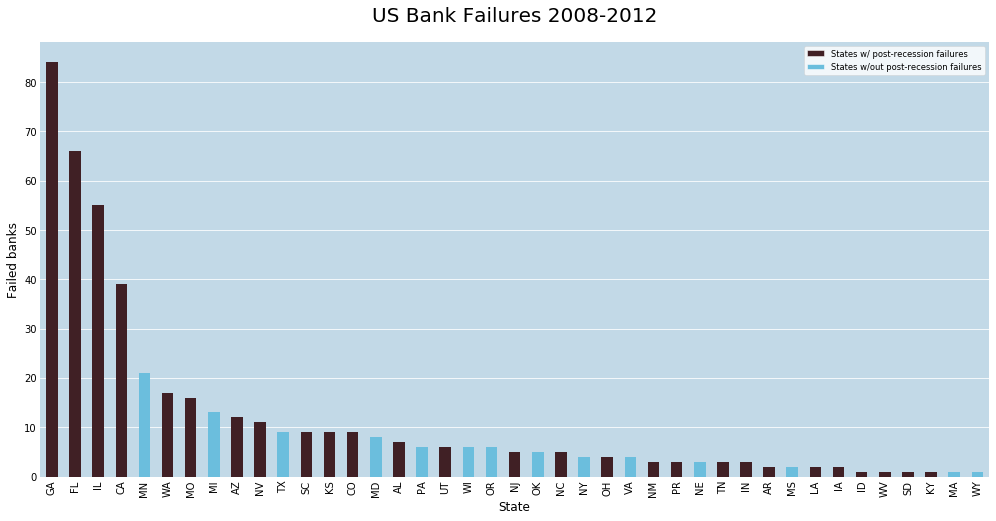

In [92]:
result = df_recession.groupby('ST').count().sort_values(by='City', ascending=False)
ax = result.plot(kind='bar', y='City', figsize=(17,8), color=['#402025', '#402025', '#402025', '#402025', '#6BBEDD', '#402025', '#402025', '#6BBEDD', '#402025', '#402025', '#6BBEDD', '#402025', '#402025', '#402025', '#6BBEDD', '#402025', '#6BBEDD', '#402025', '#6BBEDD', '#6BBEDD', '#402025', '#6BBEDD', '#402025', '#6BBEDD', '#402025', '#6BBEDD', '#402025', '#402025', '#6BBEDD', '#402025', '#402025', '#402025', '#6BBEDD', '#402025', '#402025', '#402025', '#402025', '#402025', '#402025', '#6BBEDD', '#6BBEDD'])

# custom legend
legend_elements = [Patch(facecolor='#402025', edgecolor='white',
                         label='States w/ post-recession failures'),
                   Patch(facecolor='#6BBEDD', edgecolor='white',
                         label='States w/out post-recession failures')]

ax.set_xlabel("State")
ax.set_ylabel("Failed banks")
ax.grid(False, axis='x')
ax.set_title("US Bank Failures 2008-2012", pad=20)
ax.title.set_fontsize(20)
ax.legend(handles=legend_elements)

plt.show()


In [48]:
totals = {}
totals['year'] = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
totals['bank_failures'] = [4, 11, 3, 4, 0, 0, 3, 25, 135, 157, 92, 51, 24, 18, 8, 5, 6]
totals['assets'] = [2358.6, 2705.4, 1045.2, 163.1, 0, 0, 2602.5, 373588.78, 170867, 96514, 36012.2, 12055.8, 6101.7, 3088.4, 6727.5, 278.8, 6530.7]

In [50]:
df_totals=pd.DataFrame(totals)
df_totals

,year,bank_failures,assets
0,2001,4,2358.60
1,2002,11,2705.40
2,2003,3,1045.20
3,2004,4,163.10
4,2005,0,0.00
5,2006,0,0.00
6,2007,3,2602.50
7,2008,25,373588.78
8,2009,135,170867.00
9,2010,157,96514.00


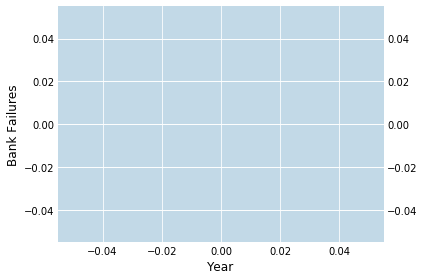

In [103]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Bank Failures')
ax1.plot(x='year', y='assets')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('')  # we already handled the x-label with ax1
ax2.plot(x=df_totals.year, y=df_totals.assets)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

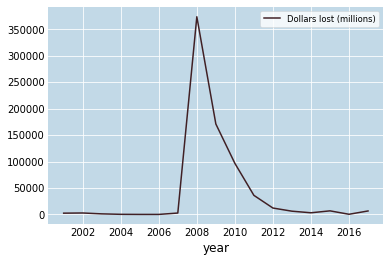

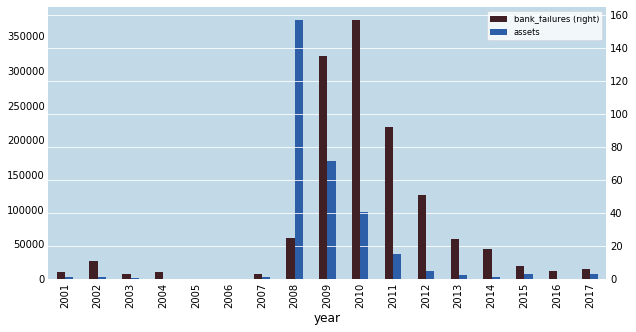

In [110]:
df_totals.plot(x='year', y='assets', label="Dollars lost (millions)", legend=True)
df_totals.plot(x='year', secondary_y='bank_failures', label="fails", legend=True, figsize=(10,5), kind='bar')